In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import files
files.upload()  # Upload kaggle.json from your Kaggle account


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aasiasalahuddin","key":"ce88831f2f968804e69d620212e8e399"}'}

In [8]:
# Step 2: Set up Kaggle API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download dataset
!kaggle datasets download -d architsharma01/loan-approval-prediction-dataset

# Step 4: Unzip the dataset
!unzip loan-approval-prediction-dataset.zip -d loan-approval-prediction

Dataset URL: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
License(s): MIT
loan-approval-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  loan-approval-prediction-dataset.zip
  inflating: loan-approval-prediction/loan_approval_dataset.csv  


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
!pip install imbalanced-learn



In [17]:
# 2. Load dataset
df = pd.read_csv('loan-approval-prediction/loan_approval_dataset.csv')

# 3. Clean column names
df.columns = df.columns.str.strip()

# 4. Display basic info
print(df.head())
print(df.info())

   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           80

In [18]:
#5. Drop 'loan_id' as it's not useful
df.drop('loan_id', axis=1, inplace=True)

In [19]:
#6. Handle missing values
# Separate numerical and categorical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [16]:
print(df.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [20]:
# 7. Encode categorical features
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [21]:
# 8. Define features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [22]:
# 9. Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [23]:
# 10. Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [24]:
# 11. Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, lr_preds))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       531
           1       0.76      0.74      0.75       323

    accuracy                           0.81       854
   macro avg       0.80      0.80      0.80       854
weighted avg       0.81      0.81      0.81       854



In [25]:
# 12. Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
dt_preds = dt_model.predict(X_test)

print("Decision Tree:")
print(classification_report(y_test, dt_preds))

Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.98      0.95      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



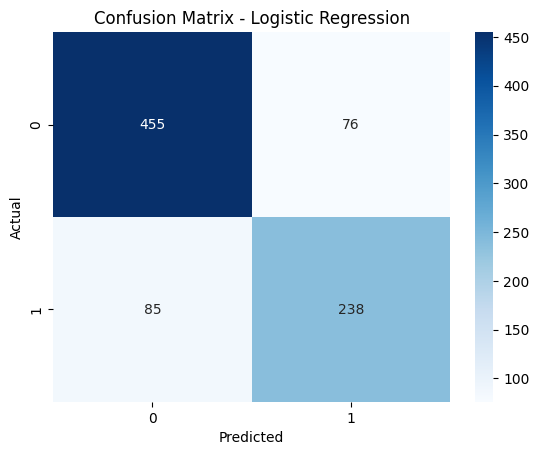

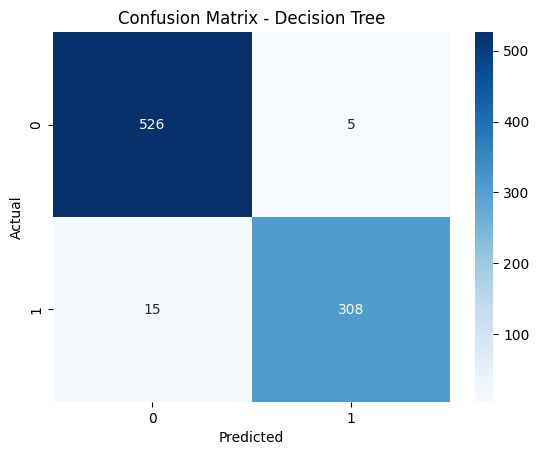

In [26]:
 #13. Optional: Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, lr_preds, "Logistic Regression")
plot_confusion_matrix(y_test, dt_preds, "Decision Tree")